In [1]:
%matplotlib inline


# Plotting shots

Start by watching the video below, then learn how to plot shot positions.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
import pylab as p

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

## Making the shot map using iterative solution



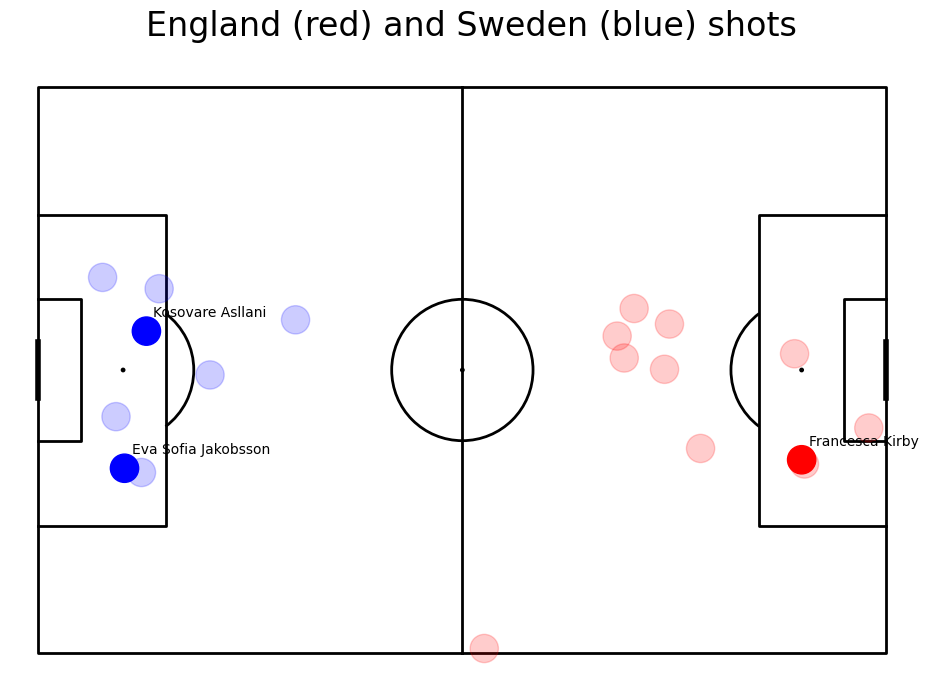

In [4]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

for i,shot in shots.iterrows():
    
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

## Using mplsoccer's Pitch class



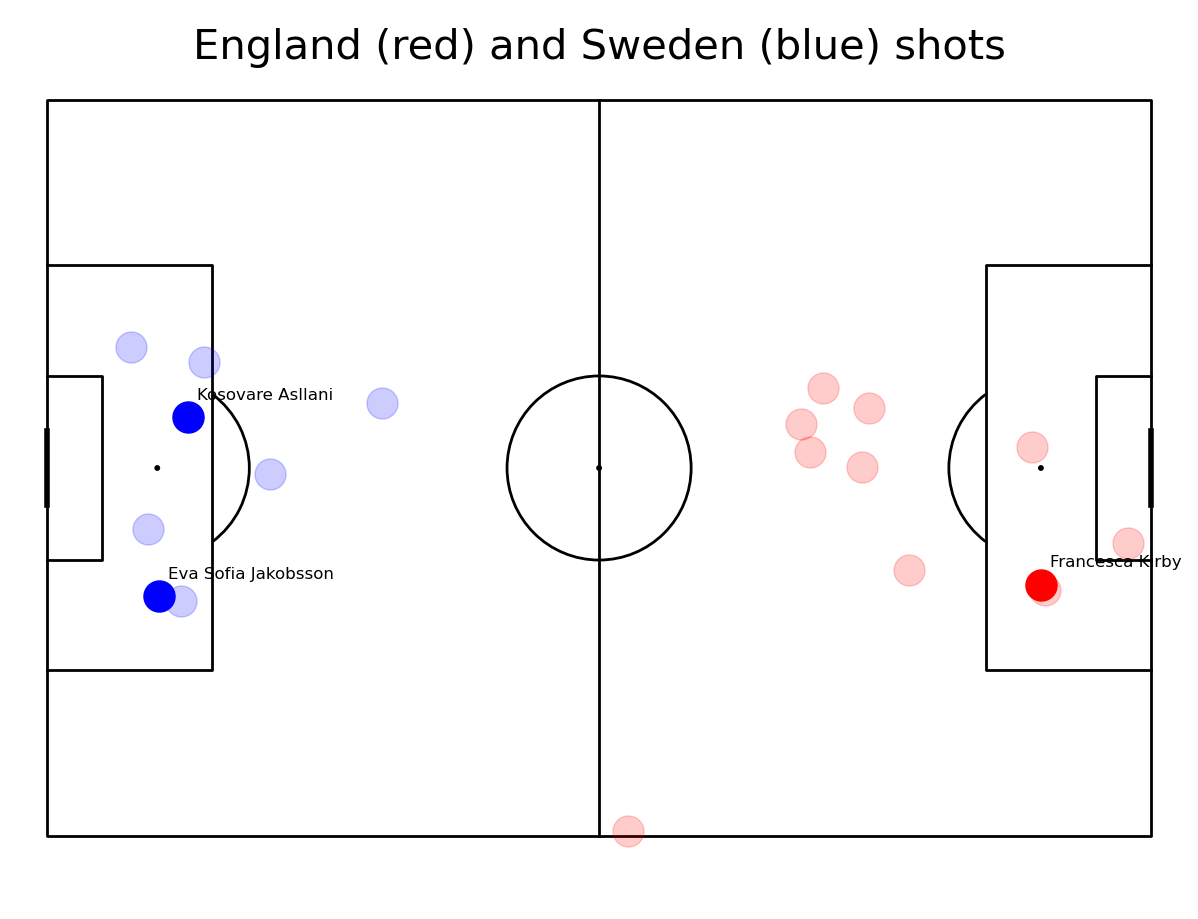

In [5]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

mask_england = (df.type_name == 'Shot') & (df.team_name == team1)

df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]


#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
     
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch']) 
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch']) 
       
mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]   

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch']) 
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch']) 
       
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)           
plt.show()

## Plotting shots on one half



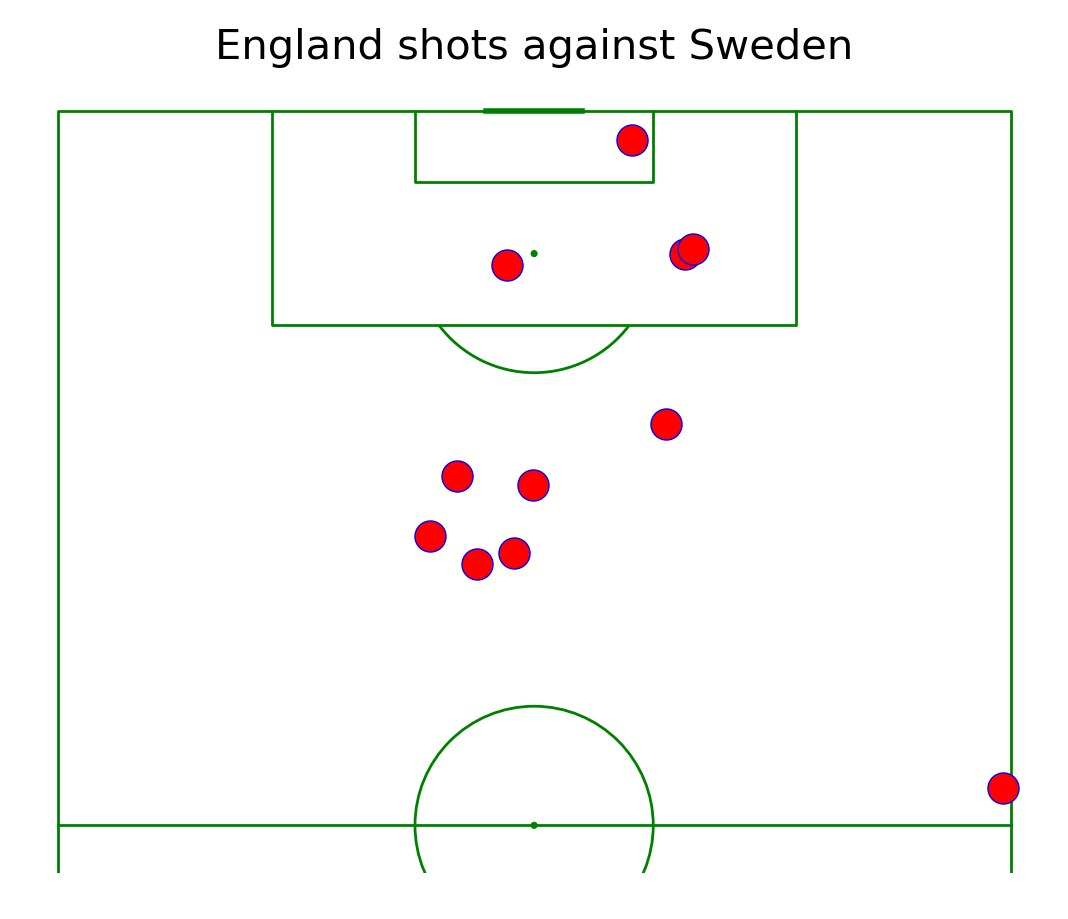

In [6]:
pitch = VerticalPitch(line_color='green', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="blue") 
fig.suptitle("England shots against Sweden", fontsize = 30)           
plt.show()

## Challenge - try it before looking at the next page
1) Create a dataframe of passes which contains all the passes in the match
2) Plot the start point of every Sweden pass. Attacking left to right.
3) Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
4) Plot arrows to show where the passes went to.



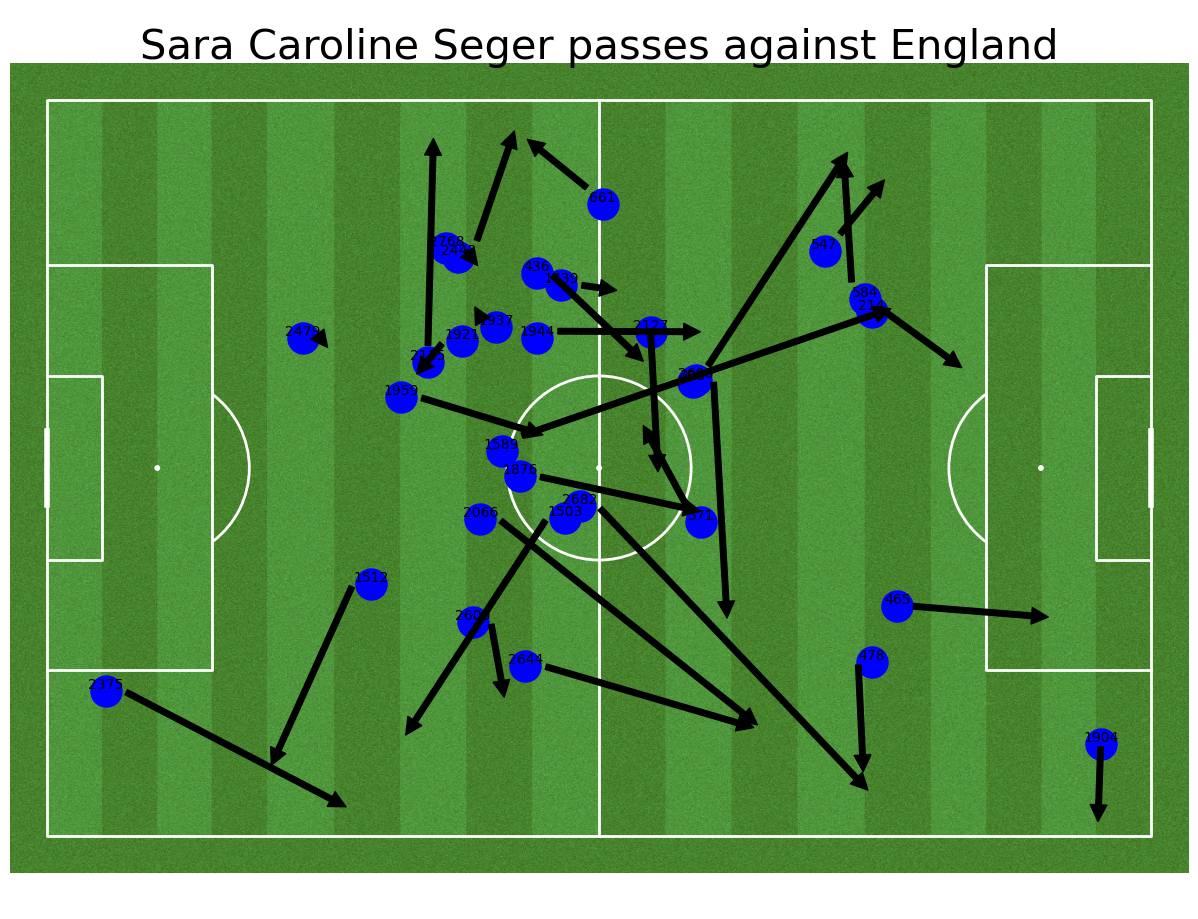

In [69]:
#create pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#queery
mask_suecia = (df.type_name == 'Pass') & (df.team_name == team2) & (df.player_name == 'Sara Caroline Seger') 
df_suecia = df.loc[mask_suecia, ['x', 'y', 'end_x','end_y','outcome_name', "player_name"]]

#sacttering the passes
#pitch.scatter(df_suecia.x, df_suecia.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="blue") 
#plt.arrow(df_suecia.x, df_suecia.y,df_suecia.end_x, df_suecia.end_y)
#fig.suptitle("Sara Caroline Seger passes against England", fontsize = 30)           
#plt.show()

for i, row in df_suecia.iterrows():
    pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "blue",ax=ax['pitch']) 
    #p.arrow(row.x, row.y,row.end_x,row.end_y,head_width = 0.2,width = 0.05)
    pitch.annotate(i,ha = 'center', va = 'bottom',
xytext = (row.x, row.y),xy = (row.end_x,row.end_y),arrowprops = {'facecolor' : 'black'},ax=ax['pitch'])
fig.suptitle("Sara Caroline Seger passes against England", fontsize = 30)           
plt.show()